In [65]:
import tensorflow as tf
import keras

from keras.utils import to_categorical
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

import pandas as pd
import numpy as np

from keras.datasets import mnist
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout, Flatten
from keras import datasets

%matplotlib inline

In [66]:
(x_train, y_train),(x_test, y_test) = tf.keras.datasets.mnist.load_data()
y_true = y_test

In [67]:
img_rows,img_cols = 28,28
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)

print("Train set shape", x_train.shape, 'trainlabel shape', y_train.shape)
print('test set shape', x_test.shape, 'test labels:', y_test.shape)



Train set shape (60000, 28, 28, 1) trainlabel shape (60000,)
test set shape (10000, 28, 28, 1) test labels: (10000,)


In [68]:
x_train = np.pad(x_train, ((0,0),(2,2),(2,2),(0,0)), 'constant')
x_test = np.pad(x_test, ((0,0),(2,2),(2,2),(0,0)), 'constant')

In [69]:
#Split the train set to validation set
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2)

In [70]:
# Data Normalization
x_train = (x_train - x_train.mean()) / x_train.std()

x_val = (x_val - x_val.mean()) / x_val.std()

x_test = (x_test - x_test.mean()) / x_test.std()


In [71]:
y_train = keras.utils.to_categorical(y_train)

print('X_train shape:', x_train.shape, 'X_label shape:', y_train.shape)

y_test = keras.utils.to_categorical(y_test)

print('test set shape:', x_test.shape, 'test label shape', y_test.shape)

y_val = keras.utils.to_categorical(y_val)

print('val set shape:', x_val.shape, 'val_lavels shape:', y_val.shape)

X_train shape: (48000, 32, 32, 1) X_label shape: (48000, 10)
test set shape: (10000, 32, 32, 1) test label shape (10000, 10)
val set shape: (12000, 32, 32, 1) val_lavels shape: (12000, 10)


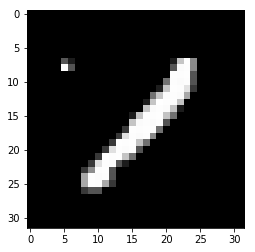

In [72]:
#Plot input data

test_im = x_train[13]
plt.imshow(test_im.reshape(32,32), cmap='gray', interpolation='none')
plt.show()

In [73]:
#Define model architecture

model = Sequential()


#Conv Layer 1
model.add(Conv2D(filters = 6, 
                 kernel_size = 5, 
                 strides = 1, 
                 activation = 'relu', 
                 input_shape = (32,32,1)))

#Pooling layer 1
model.add(MaxPooling2D(pool_size = 2, strides = 2))


#Conv Layer 2
model.add(Conv2D(filters = 16, 
                 kernel_size = 5,
                 strides = 1,
                 activation = 'relu',
                 input_shape = (14,14,6)))

#Pooling Layer 2
model.add(MaxPooling2D(pool_size = 2, strides = 2))
#Flatten
model.add(Flatten())
#Layer 3
#Fully connected layer 1
model.add(Dense(units = 120, activation = 'relu'))

#Layer 4
#Fully connected layer 2
model.add(Dense(units = 84, activation = 'relu'))

#Layer 5
#Output Layer
model.add(Dense(units = 10, activation = 'softmax'))
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])



In [74]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 28, 28, 6)         156       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 10, 10, 16)        2416      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 400)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 120)               48120     
_________________________________________________________________
dense_14 (Dense)             (None, 84)                10164     
__________

In [75]:
hist = model.fit(x_train ,y_train, steps_per_epoch = 10, epochs = 20, validation_data=(x_val,y_val), validation_steps = 10)

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
10/10 [==============================] - 19s 2s/step - loss: 1.8602 - acc: 0.4829 - val_loss: 1.2075 - val_acc: 0.6939
Epoch 2/20
10/10 [==============================] - 18s 2s/step - loss: 0.7676 - acc: 0.8012 - val_loss: 0.4523 - val_acc: 0.8645
Epoch 3/20
10/10 [==============================] - 19s 2s/step - loss: 0.3581 - acc: 0.8926 - val_loss: 0.2968 - val_acc: 0.9101
Epoch 4/20
10/10 [==============================] - 19s 2s/step - loss: 0.2507 - acc: 0.9243 - val_loss: 0.2217 - val_acc: 0.9330
Epoch 5/20
10/10 [==============================] - 19s 2s/step - loss: 0.1901 - acc: 0.9432 - val_loss: 0.1732 - val_acc: 0.9473
Epoch 6/20
10/10 [==============================] - 20s 2s/step - loss: 0.1492 - acc: 0.9557 - val_loss: 0.1436 - val_acc: 0.9562
Epoch 7/20
10/10 [==============================] - 20s 2s/step - loss: 0.1223 - acc: 0.9637 - val_loss: 0.1233 - val_acc: 0.9638
Epoch 8/20
10/10 [======================

In [76]:
score = model.evaluate(x_test, y_test, verbose= 1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

10000/10000 [==============================] - 0s 48us/step
Test loss: 0.04694561922934372
Test accuracy: 0.9857


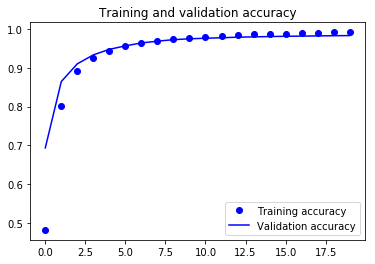

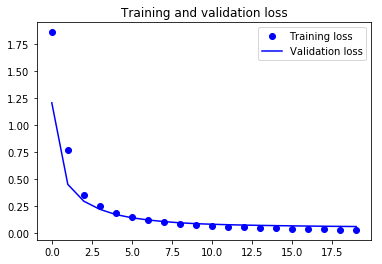

In [77]:
accuracy = hist.history['acc']
val_accuracy = hist.history['val_acc']
epochs = range(len(accuracy))
loss = hist.history['loss']
val_loss = hist.history['val_loss']
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [78]:
#get the predictions for the test data
predicted_classes = model.predict_classes(x_test)

#get the indices to be plotted

correct = np.nonzero(predicted_classes==y_true)[0]
incorrect = np.nonzero(predicted_classes!=y_true)[0]

In [79]:
num_classes = 10
from sklearn.metrics import classification_report
target_names = ["Class {}".format(i) for i in range(num_classes)]
print(classification_report(y_true, predicted_classes, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.98      0.99      0.99       980
     Class 1       0.99      0.99      0.99      1135
     Class 2       0.99      0.99      0.99      1032
     Class 3       0.99      0.99      0.99      1010
     Class 4       0.98      0.99      0.99       982
     Class 5       0.98      0.99      0.99       892
     Class 6       0.99      0.99      0.99       958
     Class 7       0.98      0.98      0.98      1028
     Class 8       0.98      0.98      0.98       974
     Class 9       0.99      0.98      0.98      1009

   micro avg       0.99      0.99      0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



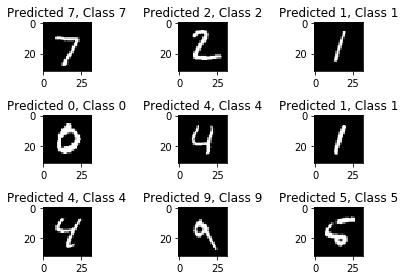

In [80]:
for i, c in enumerate(correct[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(x_test[c].reshape(32,32), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[c], y_true[c]))
    plt.tight_layout()

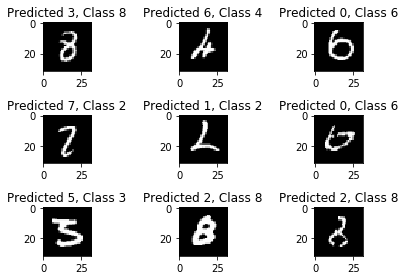

In [81]:
for i, inc in enumerate(incorrect[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(x_test[inc].reshape(32,32), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[inc], y_true[inc]))
    plt.tight_layout()